In [1]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with pm.Model() as model:
    mu = pm.Normal('$\mu$', 10, 5)
    sigma = pm.Gamma('$\sigma$', 1, .3)
    y = pm.Normal('$y$', mu, sigma, observed=[7,7.5, 6.6, 6, 6.2,6.1, 4,4,3, 2])
    prior = pm.sample_prior_predictive(10000)
    trace = pm.sample(10000)
    post = pm.sample_posterior_predictive(trace, 10)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:05<00:00, 7591.10draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
100%|██████████| 10/10 [00:00<00:00, 603.83it/s]


In [3]:
mu

$\mu$

In [4]:
sigma

$\sigma$

In [5]:
y

$y$

In [4]:
import arviz as az

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)
data

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> observed_data

In [7]:
data.prior['$\sigma$']

<xarray.DataArray '$\\sigma$' (chain: 1, draw: 10000)>
array([[3.051898, 1.114561, 0.078178, ..., 1.755502, 1.027054, 4.424343]])
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 9993 9994 9995 9996 9997 9998 9999

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f911cd67ba8>,
      dtype=object)

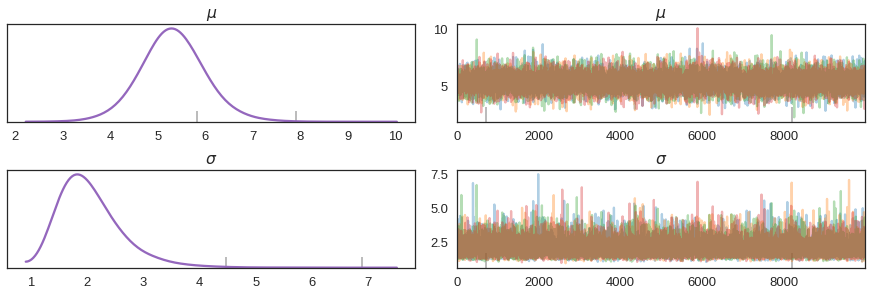

In [8]:
az.plot_trace(data, combined=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f911c241898>,
      dtype=object)

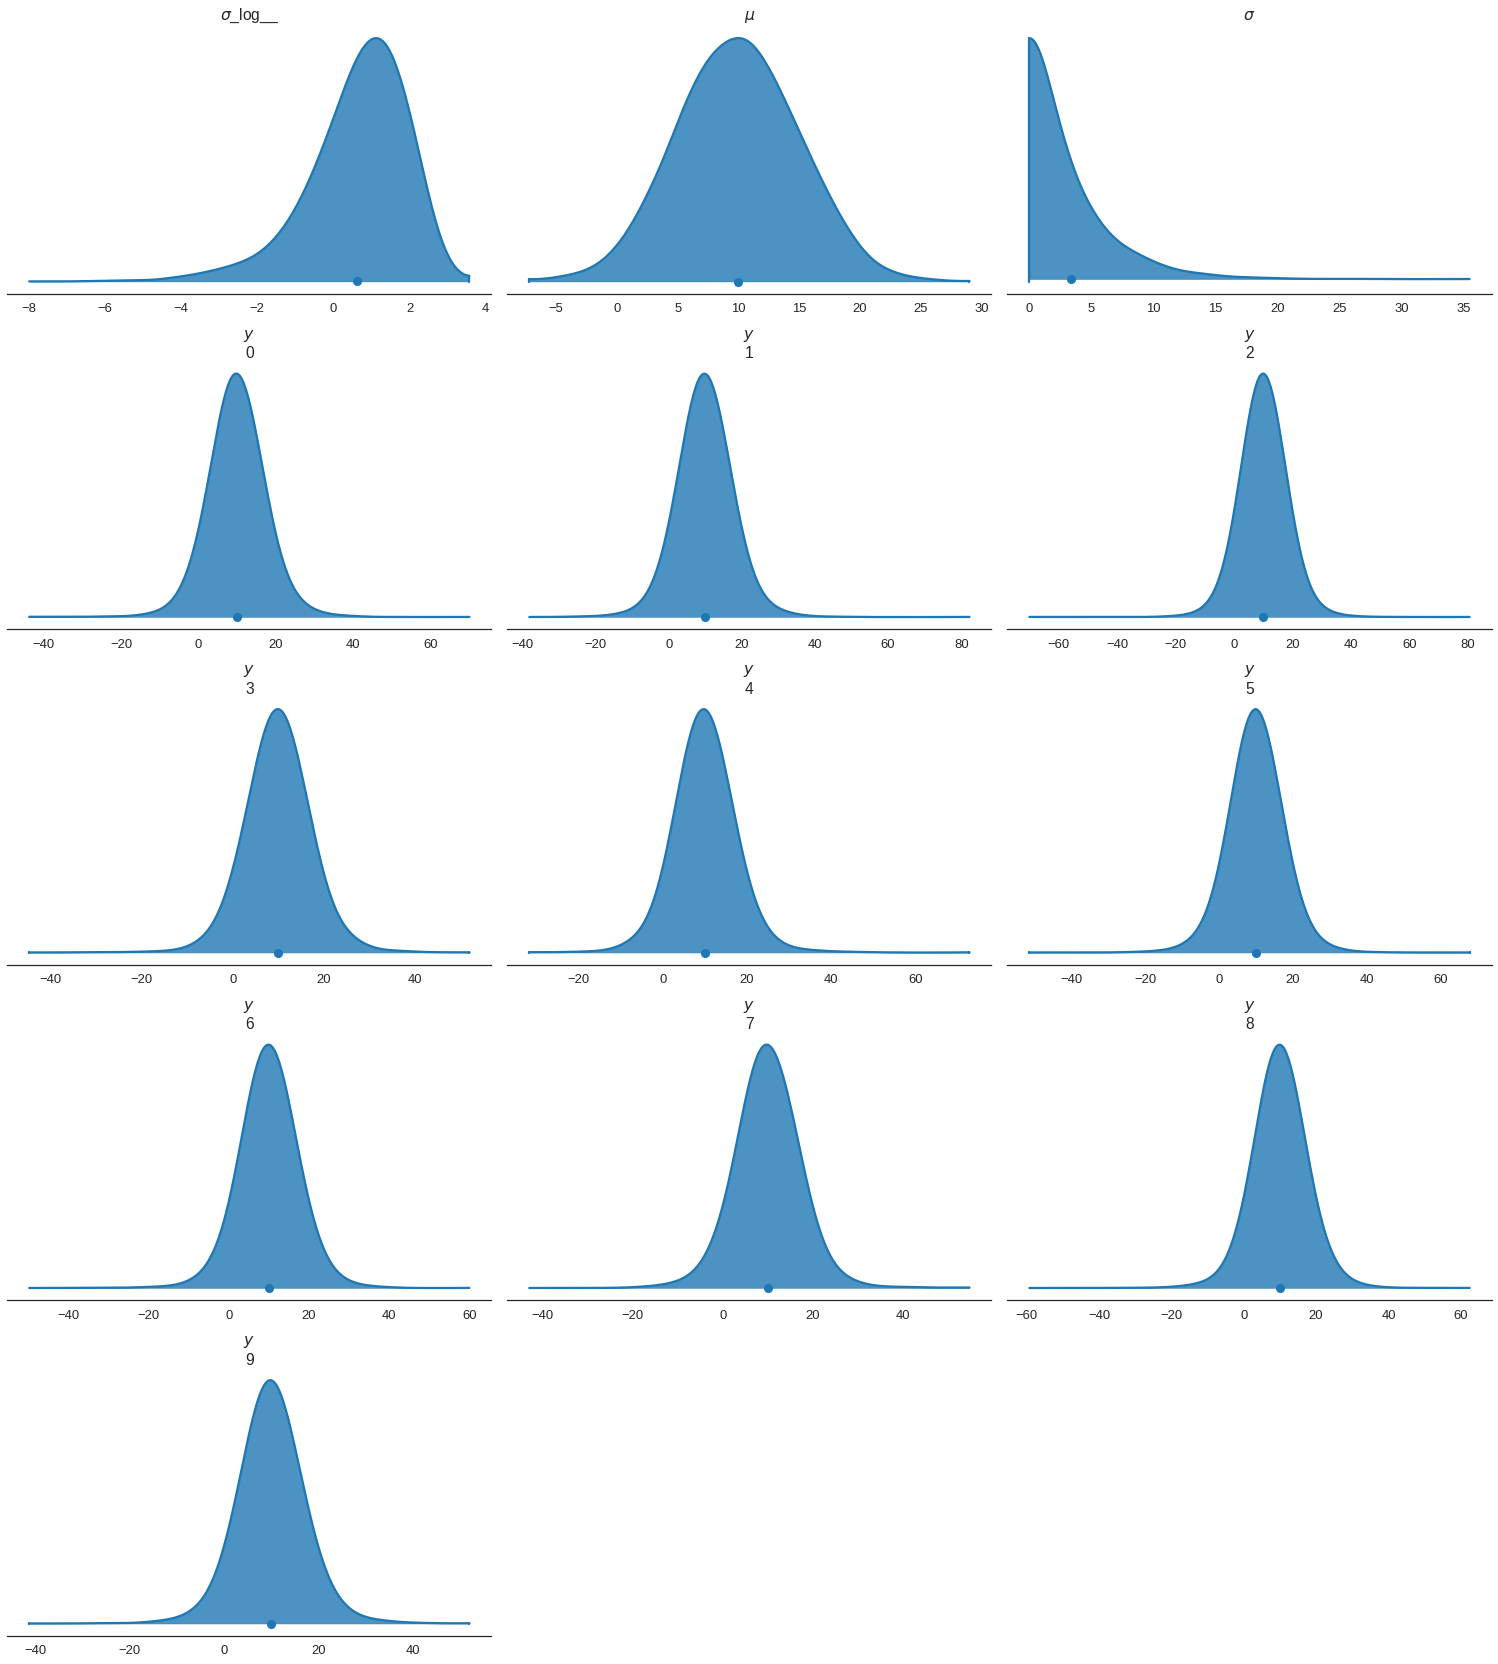

In [9]:
az.plot_density(data, shade=.8, group='prior', credible_interval=1)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91117d9278>,
      dtype=object)

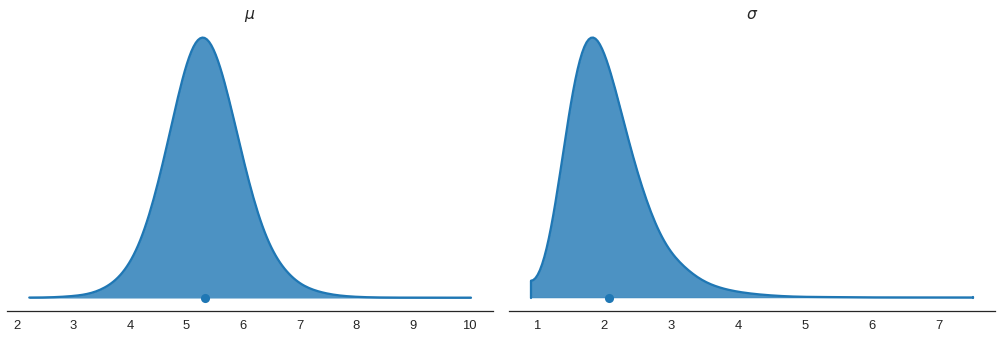

In [10]:
az.plot_density(data, shade=.8, group='posterior', credible_interval=1)


/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/arviz/plots/pairplot.py:159: SyntaxWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or set divergences=False
  SyntaxWarning,


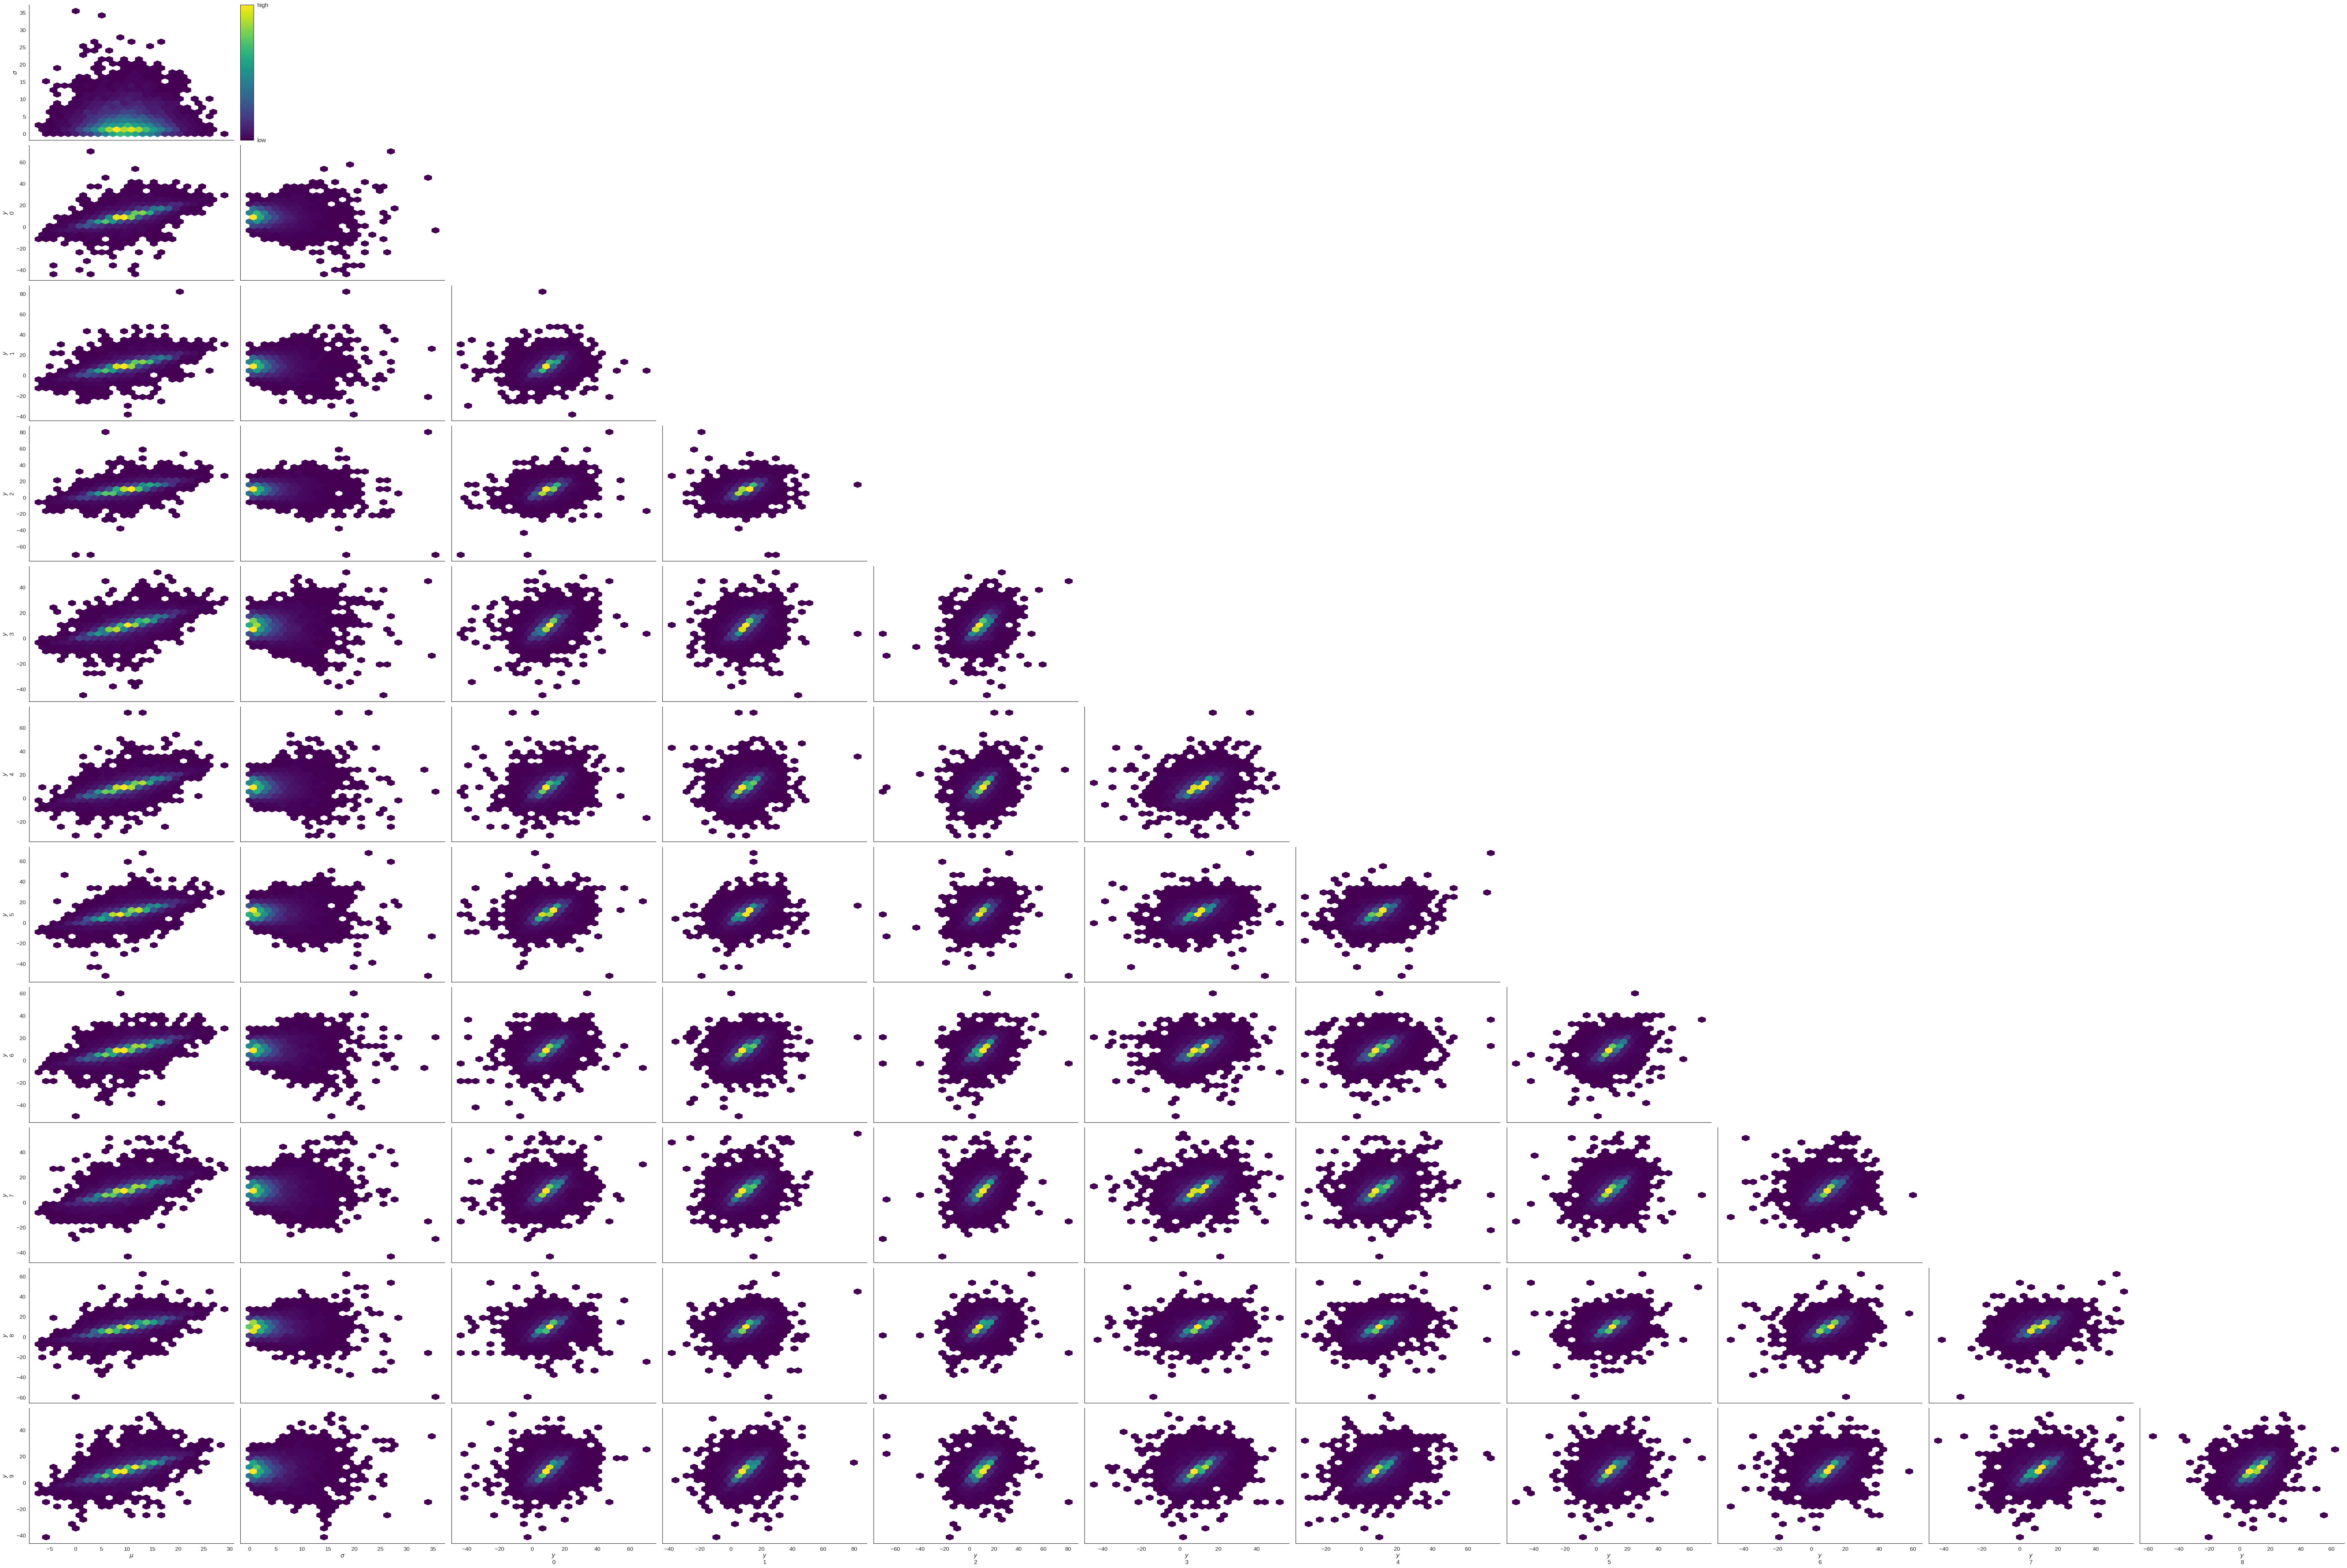

In [11]:
az.style.use('arviz-white')

az.plot_pair(data, divergences=True, var_names=['$\mu$', '$\sigma$', '$y$'], kind='hexbin', contour=True,
            colorbar=True, plot_kwargs={'cmap':'viridis'});

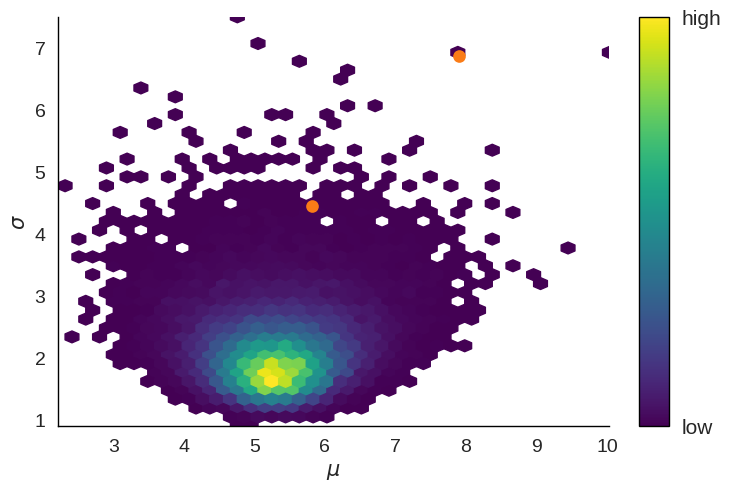

In [12]:

az.plot_pair(data, divergences=True, var_names=['$\mu$', '$\sigma$', '$y$'], kind='hexbin', contour=True,
            colorbar=True, plot_kwargs={'cmap':'viridis'});

(<matplotlib.axes._subplots.AxesSubplot at 0x7f90f9aec908>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9110019e48>)

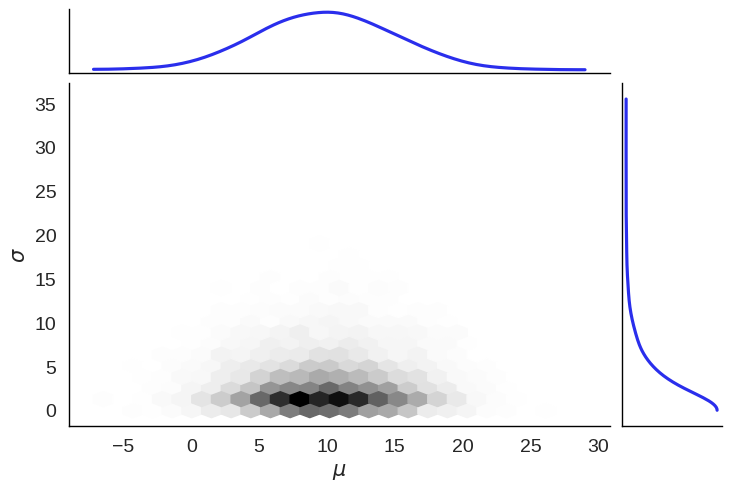

In [13]:
az.plot_joint(data.prior, kind='hexbin', var_names=['$\mu$', '$\sigma$'])

/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/arviz/plots/forestplot.py:207: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/arviz/plots/forestplot.py:208: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False


(<Figure size 600x520 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f910febd7b8>],
       dtype=object))

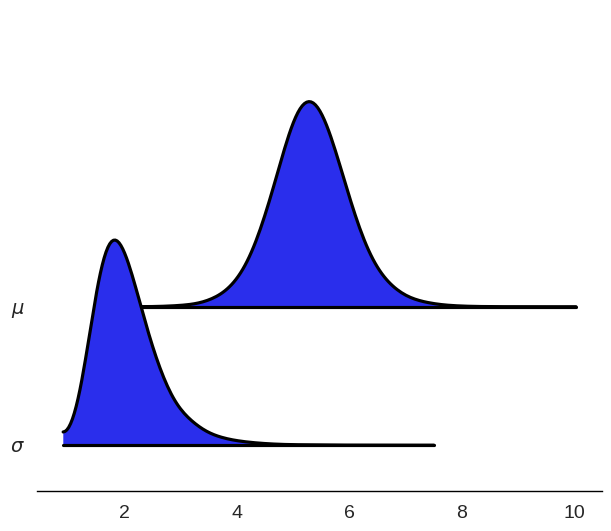

In [14]:
az.plot_forest(trace, kind='ridgeplot', combined=True)

<IPython.core.display.Javascript object>


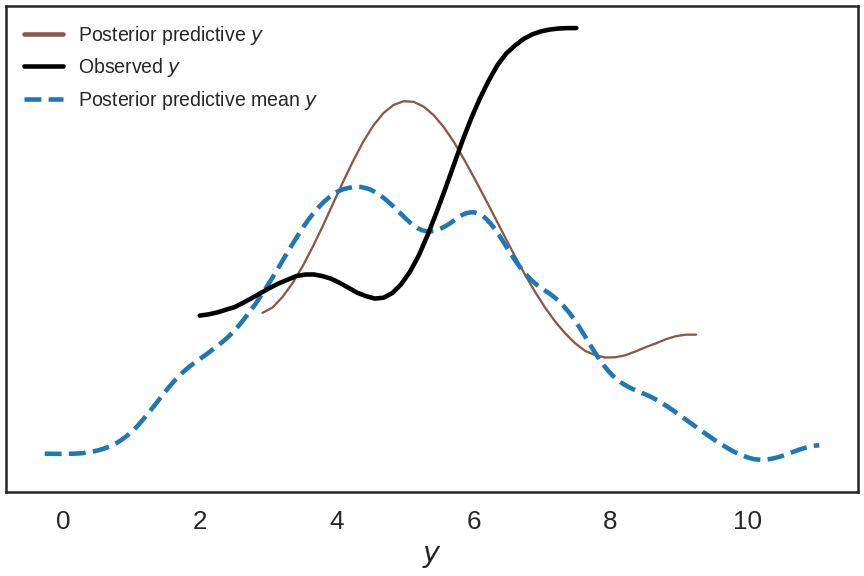

In [20]:
%matplotlib notebook
a, b = az.plot_ppc(data, kind='density',num_pp_samples=10,  animated=True, animation_kwargs={'blit':True})